# Context

**Introduction**

This report presents the findings of an exploratory data analysis (EDA) on a dataset related to route planning. The dataset contains information about bus routes, stops, and schedules in a specific region. The goal of this analysis is to understand the structure and content of the data, identify patterns and relationships, and prepare the data for further analysis or modeling.

**Data Overview**

The dataset consists of 1312332 rows and 26 columns. The columns can be broadly categorized into three groups:

1.  **Route information**: Route ID, Route Name, Direction, Private Code, and Order.
2.  **Stop information**: Stop Place ID, Stop Place Name, Stop Place Private Code, Stop Place Latitude, and Stop Place Longitude.
3.  **Schedule information**: Arrival Time, Departure Time, Journey ID, Transport Mode, Operator Ref, and Day Type Ref.

**Data Quality Issues**

During the analysis, several data quality issues were identified:

*   **Missing values**: The Public Code column contains only NaN values, indicating that this information is not available or not relevant.
*   **Duplicate values**: The Quay Latitude and Quay Longitude columns have approximately the same values as the Stop Place Latitude and Stop Place Longitude columns, respectively. This suggests that the quay coordinates are not distinct from the stop place coordinates.
*   **Inconsistent data types**: The Arrival Time and Departure Time columns contain both time and NaN values. The time values are in the format "HH:MM:SS", while the NaN values indicate missing or unknown times.

**Data Preprocessing**

To address the data quality issues, the following preprocessing steps were performed:

*   **Remove Public Code column**: The Public Code column was removed from the dataset since it contains only NaN values.
*   **Remove duplicate columns**: The Quay Latitude and Quay Longitude columns were removed since they have the same values as the Stop Place Latitude and Stop Place Longitude columns.
*   **Convert time columns to seconds**: The Arrival Time and Departure Time columns were converted to seconds since the start of the day to facilitate calculations and comparisons.

**Graph Construction**

A graph was constructed from the preprocessed data to represent the route network. The graph consists of nodes (stops) and edges (connections between stops). Each node has attributes such as stop name, route name, latitude, longitude, arrival time, departure time, and transport mode. Each edge has attributes such as travel time, route name, and transport mode.

The graph was constructed by iterating over the preprocessed data and adding nodes and edges as follows:

*   **Create nodes**: Each stop was added as a node in the graph with its attributes.
*   **Add edges**: Each connection between two stops was added as an edge in the graph with its attributes.

The resulting graph has 1312332 nodes and 3150 edges.

**Conclusion**

This exploratory data analysis has provided insights into the structure and content of the route planning dataset. The preprocessing steps have addressed data quality issues and prepared the data for further analysis or modeling. The constructed graph represents the route network and can be used for route planning and optimization tasks.

# New work

In [1]:
import pickle
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection 
plt.rcParams["figure.figsize"] = (15, 8)

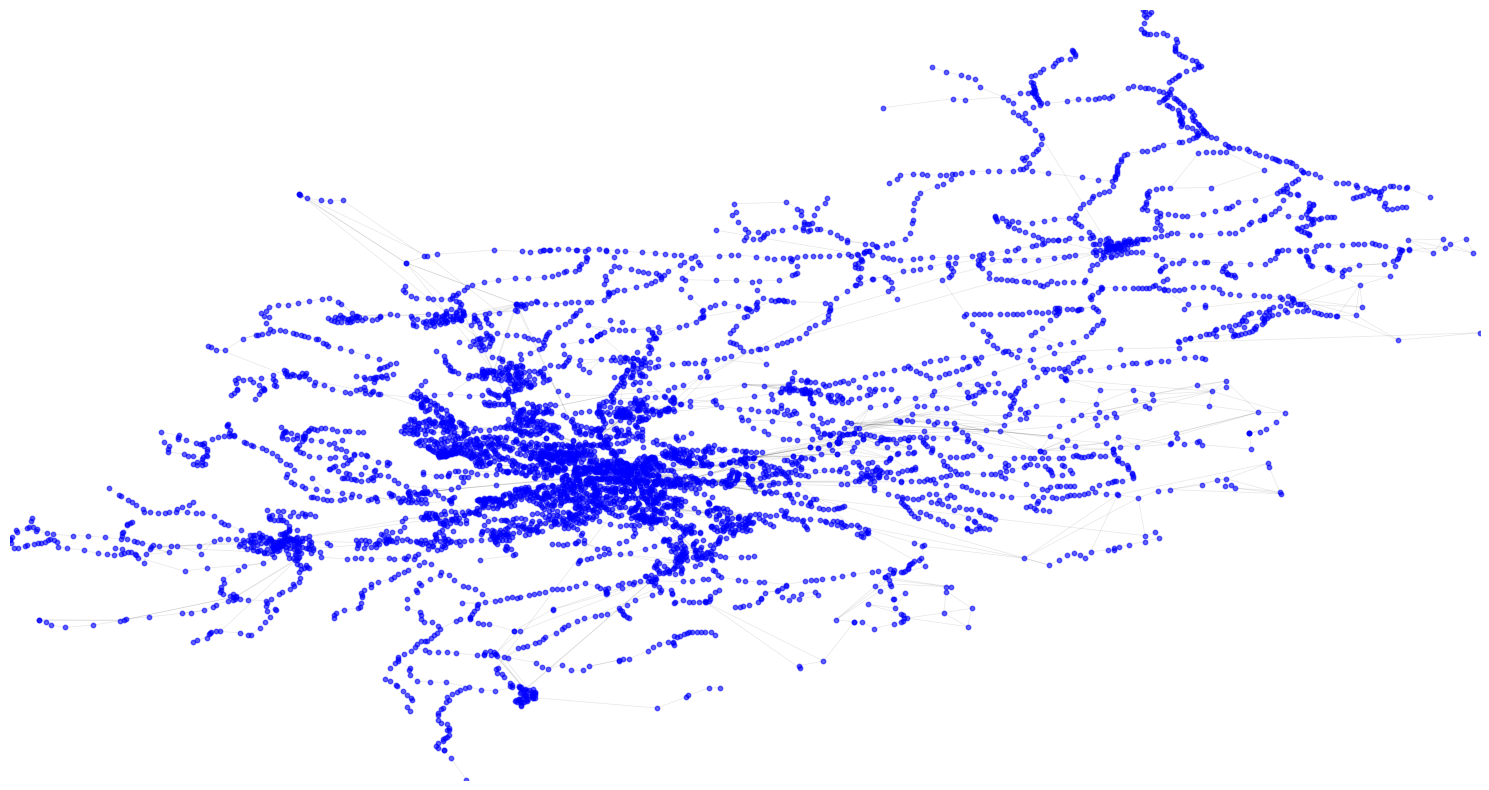

In [2]:
with open("graph.pickle", "rb") as f:
    graph = pickle.load(f)
    
def visualize_graph(graph, node_size=10, edge_alpha=0.1):
    # Create a NetworkX graph from the dictionary
    G = nx.Graph()
    
    # Add nodes
    regular_stops = []
    quay_stops = []
    for node, data in graph.items():
        G.add_node(node, pos=(data['stop_longitude'], data['stop_latitude']))
        regular_stops.append(node)
    
    # Add edges
    for node, data in graph.items():
        for neighbor, edge_data in data['neighbors'].items():
            G.add_edge(node, neighbor, weight=edge_data['travel_time'])
    
    # Get node positions
    pos = nx.get_node_attributes(G, 'pos')
    
    # Draw edges
    edges = G.edges()
    edge_collection = LineCollection(
        [np.array([pos[u], pos[v]]) for u, v in edges],
        colors='black',
        linewidths=0.5,
        alpha=edge_alpha,
        zorder=1
    )
    plt.gca().add_collection(edge_collection)
    
    # Draw regular stops
    nx.draw_networkx_nodes(
        G, pos,
        nodelist=regular_stops,
        node_size=node_size,
        node_color='blue',
        alpha=0.6,
    )
    
    
    # Set axis limits
    plt.xlim(min(x for x, _ in pos.values()), max(x for x, _ in pos.values()))
    plt.ylim(min(y for _, y in pos.values()), max(y for _, y in pos.values()))
    
    plt.axis('off')
    plt.tight_layout()
    plt.savefig("graph.png", dpi=300, bbox_inches='tight')
    plt.show()

# Assuming 'graph' is your dictionary graph
visualize_graph(graph)

Can you create an interactive plot using plotly so when the user hovers the marker over a node, the "StopPlace Name" appears.

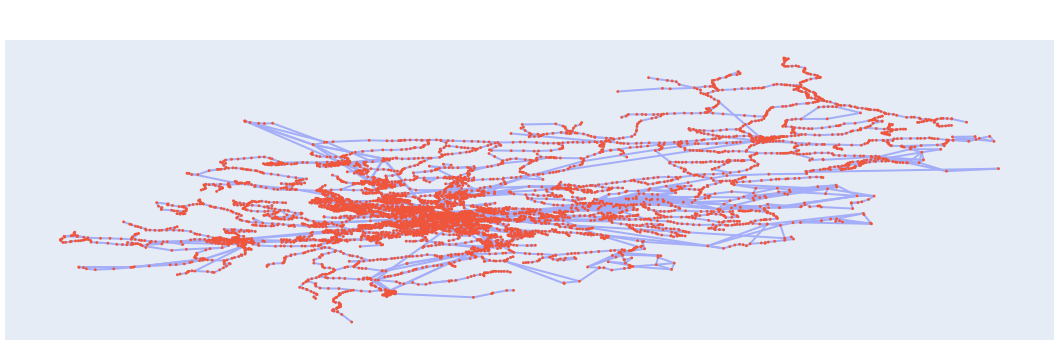

In [4]:
import plotly.graph_objects as go
import networkx as nx

# Assuming 'graph' is your dictionary graph
G = nx.Graph()

# Add nodes
regular_stops = []
quay_stops = []
for node, data in graph.items():
    G.add_node(node, pos=(data['stop_longitude'], data['stop_latitude']), 
               stop_name=data['stop_name'])
    regular_stops.append(node)

# Add edges
for node, data in graph.items():
    for neighbor, edge_data in data['neighbors'].items():
        G.add_edge(node, neighbor, weight=edge_data['travel_time'])

# Get node positions
pos = nx.get_node_attributes(G, 'pos')

# Get node names
node_names = nx.get_node_attributes(G, 'stop_name')

# Create edges
edge_x = []
edge_y = []
for edge in G.edges():
    source, target = edge
    x0, y0 = pos[source]
    x1, y1 = pos[target]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

# Create node positions
node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

# Create the figure
fig = go.Figure(data=[go.Scatter(
    x=edge_x,
    y=edge_y,
    mode='lines',
    line_shape='spline',
    opacity=0.5,
    hoverinfo='none'
),
go.Scatter(
    x=node_x,
    y=node_y,
    mode='markers',
    hoverinfo='text',
    hovertext=[node_names[node] for node in G.nodes()],
    marker=dict(size=3)
)])

# Show the plot
fig.update_layout(
    showlegend=False,
    hovermode='x',
    margin=dict(b=20, l=5, r=5, t=40),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
fig.show()

Add zoom button

In [9]:
%run augmented_local_generation.py
from IPython.core.getipython import get_ipython
from IPython.display import Markdown

path = "Visualization.ipynb"
model = "llama-3.1-70b-versatile"
result = run_conversion(path, model)

# Create a new cell with the display command
get_ipython().set_next_input("Markdown(result)", replace=False)

APIStatusError: Error code: 413 - {'error': {'message': 'Request too large for model `llama-3.1-70b-versatile` in organization `org_01hqzv5y58e728xjrhnzmqtw8e` on tokens per minute (TPM): Limit 6000, Requested 156587, please reduce your message size and try again. Visit https://console.groq.com/docs/rate-limits for more information.', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}

APIStatusError: Error code: 413 - {'error': {'message': 'Request too large for model `llama-3.1-70b-versatile` in organization `org_01hqzv5y58e728xjrhnzmqtw8e` on tokens per minute (TPM): Limit 6000, Requested 156587, please reduce your message size and try again. Visit https://console.groq.com/docs/rate-limits for more information.', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}